# Signal Generation
This tutorial covers how one can can create the projected signal starting with a pdb structure or
with a density map. The density map, projection and CTF corruption is generated using EMAN2. Please,
follow the README.md on how to install the required packages.

### Load Libraries

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd()) + "/../src")

import EMCrafter
from EMCrafter.signal import SignalGenerator
EMCrafter.base._set_logging(minimal=True)

## 1. Initialize Signal Simulator

In [2]:
# Set variables:
EMAN2_DIR = "../../../../eman2/" # EMAN2 directory path
PDB = "data/pdbs/V1.pdb"         # PDB file path
OUTPUT = "data/maps"             # Output path

# Initialize class
sgen = SignalGenerator(
    force=True,                  # In case output files already exist, force=True
    verbose=2)                   # Verbosity level

# Set variables
sgen.set_eman_dir(EMAN2_DIR)
sgen.set_pdb(PDB)
sgen.set_output(OUTPUT)

SignalGenerator initialized
Environment set to: miniconda3/envs/emcraft/bin/python
Setting number of CPUs to: 1
Setting EMAN directory to: ../../../../eman2/
Setting PDB file to: data/pdbs/V1.pdb
Setting output directory to: data/maps


In [3]:
# Validate setup
sgen.validate_init()

## 2. Generate Electron Density Map

In [4]:
# Set variables:
apix = 0.732       # Resolution (A/pixel)
box_size = 480     # Image size
stdout = True      # Print process result

# Generate EM density map
sgen.pdb2map(apix=apix, box=box_size, stdout=stdout)

# The density map is accessible using 'sgen.volume'

Starting 'pdb2map'...
-------------------------------------
8962 atoms used with a total charge of 64963 e- and a mass of 130 kDa
Atomic center at 184.5,179.2,182.1 (center of volume at 0,0,0)
Bounding box: x:  130.11 -  270.08
              y:  122.44 -  246.78
              z:  130.74 -  243.58
Conversion complete

-------------------------------------
Finished 'pdb2map' in 1.14s.


## 3. Project map

In [5]:
# Experimental parameters
voltage = 300  # Voltage
cs = 2.7       # Spherical aberration
bfactor = 55   # Bfactor
ampcont = 0.1  # Contrast

# Set parameters
sgen.set_parameters(apix=apix, voltage=voltage, cs=cs, bfactor=bfactor, ampcont=ampcont)

Setting parameters to: apix=0.732, voltage=300, cs=2.7, bfactor=55, ampcont=0.1


In [6]:
# Simulated signal variables
volume = sgen.volume          # Generated Density Map
alt, az, phi = 135, -45, 75   # Euler angles (EMAN2 convention)
defocus = 10000               # Defocus value (angstrom)

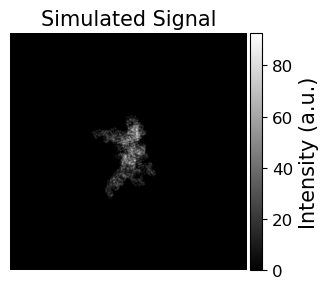

In [7]:
# Project density map
p, pmask = sgen.project_signal(volume, alt, az, phi)

# convert EMData to numpy to visualize
p_np = sgen.em2np(p)
fig = sgen.plot(p_np)

## 4. CTF corruption

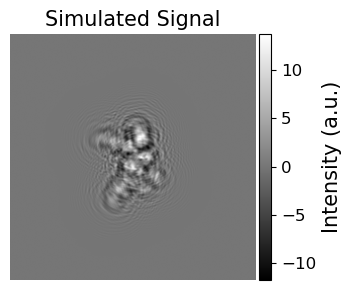

In [8]:
# CTF corruption
pc = sgen.corrupt_signal(p, defocus)
fig = sgen.plot(pc)

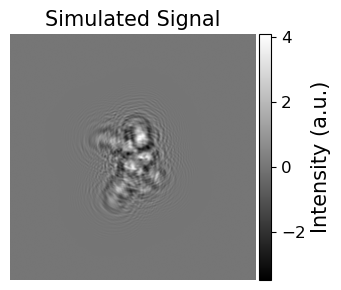

In [9]:
# Normalize
pn = sgen.normalize_signal(pc, pmask)
fig = sgen.plot(pn)

## 5. Full simulation process

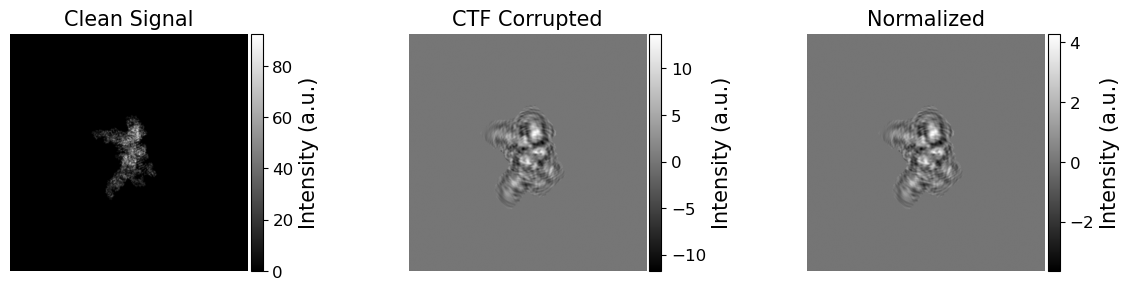

In [10]:
# Although for the purposes of understanding the current framework we have shown intermediate
# steps, one can simply use the 'simulate' method, that will take care of all steps:
p, pmask = sgen.simulate(
    sgen.volume,           # Volume
    alt, az, phi,          # Euler angles
    defocus,               # Defocus
    store=True)            # Store: store on memory the intermediate steps
                           # such as the signal, corrupted and normalized

# If store was set to true, one can visualize simply as:
fig = sgen.plot()

## Storing/Loading class

In [11]:
# Save generator
sgen.save("data/pickle/signal_generator.pkl")
# Load generator
sgen = SignalGenerator().load("data/pickle/signal_generator.pkl")

Saving SignalGenerator object  to  data/pickle/signal_generator.pkl
Loaded SignalGenerator object from data/pickle/signal_generator.pkl
